In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def gen_set(b):
    a = mpl.colors.cnames
    if "Embryophyta" in b:
        return [19,"Greens",b,a["mediumseagreen"]]
    elif "Arthropoda" in b:
        return [5,"Oranges",b,a["sandybrown"]]
    elif "Ascomycota" in b or "Basidiomycota" in b:
        return [5,"Purples",b,a["midiumpurple"]]
    elif "Craniata" in b:
        return [5,"Blues",b,a["skyblue"]]
    else:
        return [5,"pink_r",b,a["rosybrown"]]

In [3]:
def gen_heatmap(s,path,AgoList):
    df_all = pd.DataFrame([])
    x_num = []
    
    for i in AgoList:
        if i == "num":
            df_num = pd.read_csv(path+"Ago_num.tsv",header=0,sep='\t')
            df_all = pd.concat([df_all,df_num],sort=True)
            x_num += [i for i in range(1,gen_set(s)[0])]
        
        elif i == "others":
            df_others = pd.read_csv(path+"Argonaute 0.tsv",header=0,sep='\t')
            df_all = pd.concat([df_all,df_others],sort=True)
            x_num += [0] 
        
        elif i == "piwi":
            df_piwi = pd.read_csv(path+"Argonaute -1.tsv",header=0,sep='\t')
            df_all = pd.concat([df_all,df_piwi],sort=True)
            x_num += [-1]
        
        elif i == "binding":
            df_bind = pd.read_csv(path+"Argonaute -2.tsv",header=0,sep='\t')
            df_all = pd.concat([df_all,df_bind],sort=True)
            x_num += [-2]

    df_all = df_all.drop_duplicates()

    df_tax = df_all[df_all["Taxonomy"].str.contains(gen_set(s)[2])==True]  ### embryophyta in taxonomy
    df_tax_order = df_tax.sort_values("Taxonomy")
    ox = df_tax_order["OX"].unique()
    
    x_label = ["Ago"+str(num) for num in x_num]
    C=0
    
    for i in x_label:
        if i == "Ago-2":
            x_label[C] = "Ago binding"
        elif i == "Ago-1":
            x_label[C] = "Piwi"
        elif i == "Ago0":
            x_label[C] = "Others"
        C += 1

    y_label = [ox[0]]
    
    l = []
        
    for j in x_num: 
        file_name = path + "Argonaute " + str(j) + ".tsv"
        df_op = pd.read_csv(file_name,header=0,sep='\t')    ## Ago1
        df_tax_i = df_tax[df_tax["OX"].str.contains(ox[0])==True]  ## carrot in embryophyta
        df_k = df_op[df_op.OS.isin(df_tax_i.OS)]     ## Ago1 in carrot
        if len(df_k) == 0:
            l = l + [-1]
        elif len(df_k[df_k["COREaa"]!="-"]) != 0: 
            l = l + [len(df_k[df_k["COREaa"]!="-"])/len(df_k)]
            PrLD_position = lambda p: "C-terminal" if p/1000 > 0.5
            print(df_k["SEQid"]," ",PrLD_position(p))
        else:
            l = l + [-0.3]
    
    L1 = np.array(l).reshape(1,len(x_num))
    arr_2d = L1

    for i in ox[1:]:
        l = []
        y_label = y_label + [i]
        for j in x_num:
            file_name = path + "Argonaute " + str(j) + ".tsv"
            df_op = pd.read_csv(file_name,header=0,sep='\t')
            df_tax_i = df_tax[df_tax["OX"].str.contains(i)==True]
            df_k = df_op[df_op.OS.isin(df_tax_i.OS)] 
            if len(df_k) == 0:
                l = l + [-1]
            elif len(df_k[df_k["COREaa"]!="-"]) != 0:
                l = l + [len(df_k[df_k["COREaa"]!="-"])/len(df_k)]
            else:
                l = l + [-0.3]
            
        L = np.array(l).reshape(1,len(x_num))
        arr_2d = np.concatenate([arr_2d,L],0)

    hm = plt.figure(figsize=(20,1+len(arr_2d)*0.25),dpi=300)
    sns.heatmap(arr_2d,cmap=gen_set(s)[1],yticklabels=y_label,xticklabels=x_label,linewidths=0.5,vmax=1)
    file_name = gen_set(s)[2] + " Ago " + " + ".join(AgoList)+ ".png"
    file_name1 = gen_set(s)[2] + " Ago " + " + ".join(AgoList)+ ".eps"
    plt.title(gen_set(s)[2]+" Ago")
    hm.show
    hm.savefig(file_name)
    hm.savefig(file_name1)
    
    R = np.sum(arr_2d > 0, axis=0)/np.sum(arr_2d > -1, axis=0)
    b = plt.figure(figsize=(20,10))
    ax = b.add_subplot(1, 1, 1)
    ax.bar(np.arange(len(R)), R, tick_label=x_label, color = gen_set(s)[3])
    plt.xticks(rotation=90,size=20)
    plt.yticks(size=20)
    b.show
    b.savefig("wariai "+file_name)

gen_heatmap(○○動物/植物門,絶対パス,["num","binding","piwi","others"のいずれかのリスト（複数可）])

In [ ]:
gen_heatmap("Embryophyta","/home/pacbio/Heat Map/",["binding","num"])

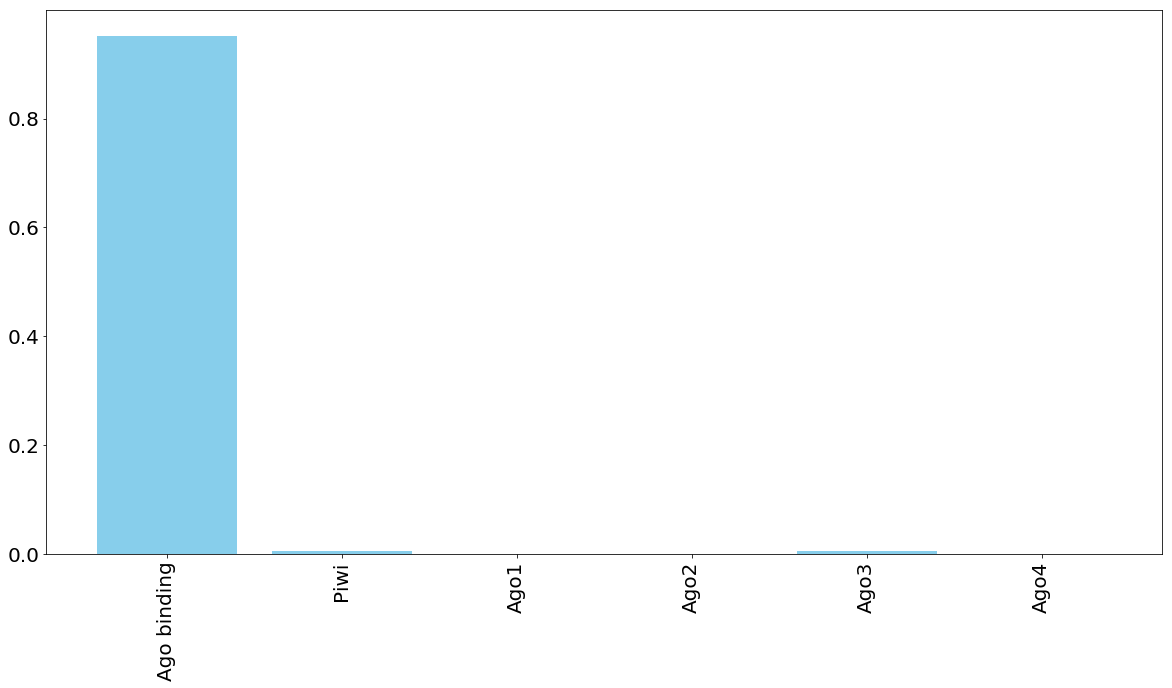

In [99]:
gen_heatmap("Craniata","/home/pacbio/Heat Map/",["binding","piwi","num"])

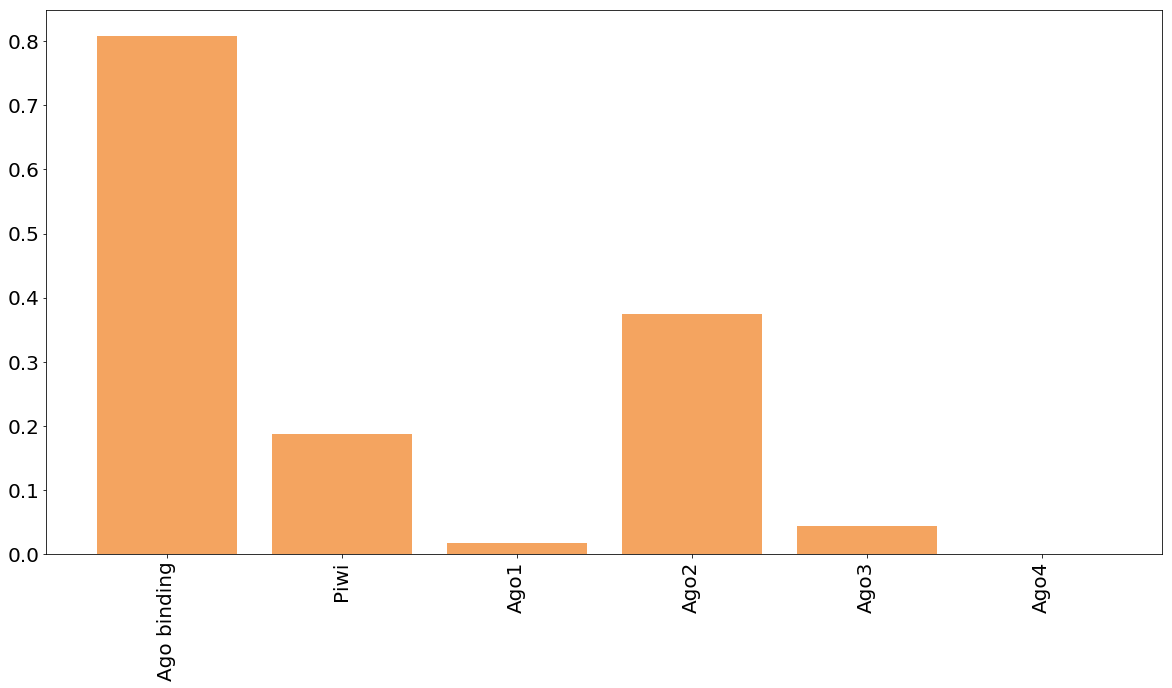

In [100]:
gen_heatmap("Arthropoda","/home/pacbio/Heat Map/",["binding","piwi","num"])